# Mini ML Project – HR Attrition Prediction

## 1. Problem Definition
Predict employee attrition using an end‑to‑end ML pipeline.

In [9]:
import pandas as pd
df = pd.read_csv("../data/processed/features.csv")
df.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Age,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition
0,-0.891688,-0.660531,0.379672,-0.057788,1.153254,-0.426230,-1.584178,-0.932014,-2.493820,0.446350,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1
1,-1.868426,0.254625,-1.026167,-0.057788,-0.660853,2.346151,1.191438,0.241988,0.338096,1.322365,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,-0.891688,1.169781,-1.026167,-0.961486,0.246200,-0.426230,-0.658973,-0.932014,0.338096,0.008343,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1
3,1.061787,1.169781,0.379672,-0.961486,0.246200,-0.426230,0.266233,-0.932014,0.338096,-0.429664,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
4,-1.868426,-1.575686,0.379672,-0.961486,-0.660853,-0.426230,1.191438,0.241988,0.338096,-1.086676,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0


## 2. Preprocessing Pipeline

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

numeric = X.select_dtypes(include=['int64','float64']).columns
categorical = X.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((1176, 52), (294, 52))

## 3. Model Training – Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


## 4. Evaluation

In [12]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1       0.35      0.64      0.45        47

    accuracy                           0.75       294
   macro avg       0.63      0.71      0.65       294
weighted avg       0.83      0.75      0.78       294

ROC AUC: 0.8023946937720733


## Confusion Matrix

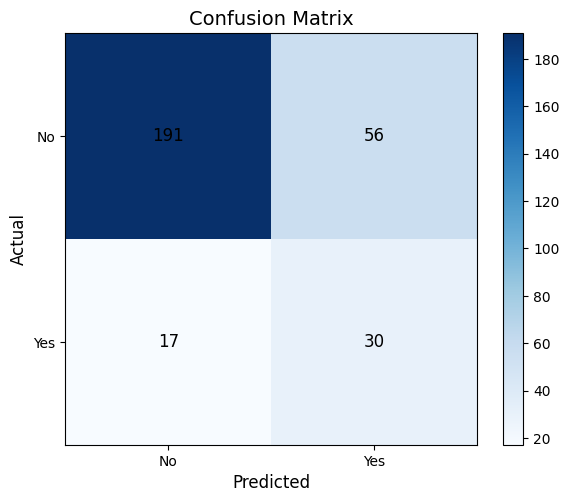

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')

plt.title("Confusion Matrix", fontsize=14)
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ["No", "Yes"])
plt.yticks(tick_marks, ["No", "Yes"])

# Print numbers on cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=12)

plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.show()


## 5. Feature Interpretation

In [14]:
feature_names = X.columns
coef = model.coef_[0]

feat = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

feat.head()


,Feature,Coefficient
39,JobRole_Laboratory Technician,1.198315
45,JobRole_Sales Representative,1.124083
24,BusinessTravel_Travel_Frequently,0.790255
51,OverTime_Yes,0.768497
29,EducationField_Human Resources,0.724799


## 6. Save Final Model

In [15]:
import joblib
joblib.dump(model, "../models/final_attrition_model.pkl")
"Model saved!" 

'Model saved!'